# Compare logBinPSD to PSD

In [6]:

import os
import sys

import matplotlib.pyplot as plt
import numpy as np

import pyda

sys.path.insert(0, os.path.abspath('../'))

from pyda.tsdata import TSData
from pyda.fsdata import FSData
from pyda.dsp.spectral import psd, logBinPSD, logpsd
import numpy

FigSize = (15, 10)  # global setting for figure size

import matplotlib.pylab as pylab

params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (15, 10),
          'axes.labelsize': 'xx-large',
          'axes.titlesize': 'xx-large',
          'xtick.labelsize': 'xx-large',
          'ytick.labelsize': 'xx-large'}
pylab.rcParams.update(params)

## Compute PSD of ltpda time-series

In [7]:
from pyda.dsp.noisegen import NoiseGen
from pyda.pzmodel import PZModel, PZ

poles = [PZ(3e-3, 2), PZ(1)]
zeros = [PZ(1e-2), PZ(1e-2)]
pzm = PZModel(poles=poles, zeros=zeros, gain=100, delay=0)
pzm.ounits = "m"
pzm.name = "system"

S_r = pzm.resp(freqs=numpy.logspace(-5, 1, 100))

S_req = 1.2 * S_r


In [8]:

fs = 10
nsecs = 1e6

ng = NoiseGen(pzm=pzm, fs=fs)
ts, state = ng.generateNoise(nsecs)
print(ts)

s = TSData.sinewave(nsecs=nsecs, fs=fs, A0=10, f0=8e-3)
print(s)
ts = ts + s
s = TSData.sinewave(nsecs=nsecs, fs=fs, A0=7, f0=237e-3)
ts = ts + s
print(ts)
ts.save("pyda_logpsd_test.pyda")

# ts = TSData.randn(nsecs=1e3, fs=1)

ts.yaxis.units = "m"
S_lts = logpsd(ts, order=1)
S_lts.name = "LPSD"
S_ts = psd(ts=ts, window='BH92', navs=100, percent_overlap=50, detrend_order=1)
S_ts.name = "WOSA"
S_ts.linestyle = "none"
S_ts.marker = "."
print(S_ts)

-------- TSData ---------
  name: system
  uuid: d2147b1b-ad24-47b2-9dd8-e9f634c77658
    fs: 10.0
 nsecs: 1000000.0
 xaxis: Time=(10000000,)[s]
 yaxis: Amplitude=(10000000,)[m]
    dx: Time=(1,)[s]
    dy: Amplitude=(1,)[m]

-----------------------------
-------- TSData ---------
  name: 
  uuid: 9a0d881f-1234-4f42-9e00-8531ad158b2a
    fs: 10.0
 nsecs: 1000000.0
 xaxis: Time=(10000000,)[s]
 yaxis: Amplitude=(10000000,)[]
    dx: Time=(1,)[s]
    dy: Amplitude=(1,)[]

-----------------------------
-------- TSData ---------
  name: ((system + ) + )
  uuid: d2147b1b-ad24-47b2-9dd8-e9f634c77658
    fs: 10.0
 nsecs: 1000000.0
 xaxis: Time=(10000000,)[s]
 yaxis: Amplitude=(10000000,)[m]
    dx: Time=(1,)[s]
    dy: Amplitude=(1,)[m]

-----------------------------
* computing lpsd of ((system + ) + ) ...
Processing PSD with segments of length 198019 and overlap of 99009.0 samples (50%)
<class 'pyda.utils.unit.Unit'>
-------- FSData ---------
  name: WOSA
  uuid: 96ac11e6-1f05-4527-80f7-a614

In [9]:

S_lts1, Smin1, Smax1 = logBinPSD(ts=ts, window='BH92', Nmax=3e6, fmax=1, Nsigma=1, order=1)
S_lts1.name = "1-sigma"
S_lts2, Smin2, Smax2 = logBinPSD(ts=ts, window='BH92', Nmax=3e6, fmax=1, Nsigma=2, order=1)
S_lts2.name = "2-sigma"

print(S_lts1.yaxis.ddata)
print(S_lts2.yaxis.ddata)


f(1) = 1.3333333333333333e-05, N=3000000.0

computing frequency 0 of 22: 1.3333333333333333e-05 Hz
computing frequency 1 of 22: 2.6666666666666667e-05 Hz
computing frequency 2 of 22: 4.4444444444444447e-05 Hz
computing frequency 3 of 22: 7.407407407407407e-05 Hz
computing frequency 4 of 22: 0.0001234567901234568 Hz
computing frequency 5 of 22: 0.00020576131687242798 Hz
computing frequency 6 of 22: 0.00034293552812071334 Hz
computing frequency 7 of 22: 0.0005715592135345223 Hz
computing frequency 8 of 22: 0.0009525986892242039 Hz
computing frequency 9 of 22: 0.00158766448204034 Hz
computing frequency 10 of 22: 0.002646107470067233 Hz
computing frequency 11 of 22: 0.004410179116778722 Hz
computing frequency 12 of 22: 0.007350298527964537 Hz
computing frequency 13 of 22: 0.012250497546607562 Hz
computing frequency 14 of 22: 0.020417495911012603 Hz
computing frequency 15 of 22: 0.034029159851687675 Hz
computing frequency 16 of 22: 0.05671526641947946 Hz
computing frequency 17 of 22: 0.0945

In [10]:
M = 4
Nseg = 1e6 #ts.size()
dT = 1 / ts.fs()
f = M / (Nseg * dT)
print(f)


4e-05


<>:14: SyntaxWarning: invalid escape sequence '\s'
<>:17: SyntaxWarning: invalid escape sequence '\s'
<>:14: SyntaxWarning: invalid escape sequence '\s'
<>:17: SyntaxWarning: invalid escape sequence '\s'
/var/folders/12/9rbv2ppn39n0pb2_57l98r444971gc/T/ipykernel_39183/4241447848.py:14: SyntaxWarning: invalid escape sequence '\s'
  yerr=Se2, color="r", linestyle='none', marker='.', label="sqrt(logPSD) 2-$\sigma$", zorder=10)
/var/folders/12/9rbv2ppn39n0pb2_57l98r444971gc/T/ipykernel_39183/4241447848.py:17: SyntaxWarning: invalid escape sequence '\s'
  yerr=Se1, color="b", linestyle='none', marker='.', label="sqrt(logPSD) 1-$\sigma$", zorder=20)
/Users/martin.hewitson/miniforge3/envs/pyperf_new_structure/lib/python3.13/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/martin.hewitson/miniforge3/envs/pyperf_new_structure/lib/python3.13/site-packages/numpy/ma/core.py:3448: ComplexWarning: Ca

<Figure size 1500x1000 with 0 Axes>

/Users/martin.hewitson/miniforge3/envs/pyperf_new_structure/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


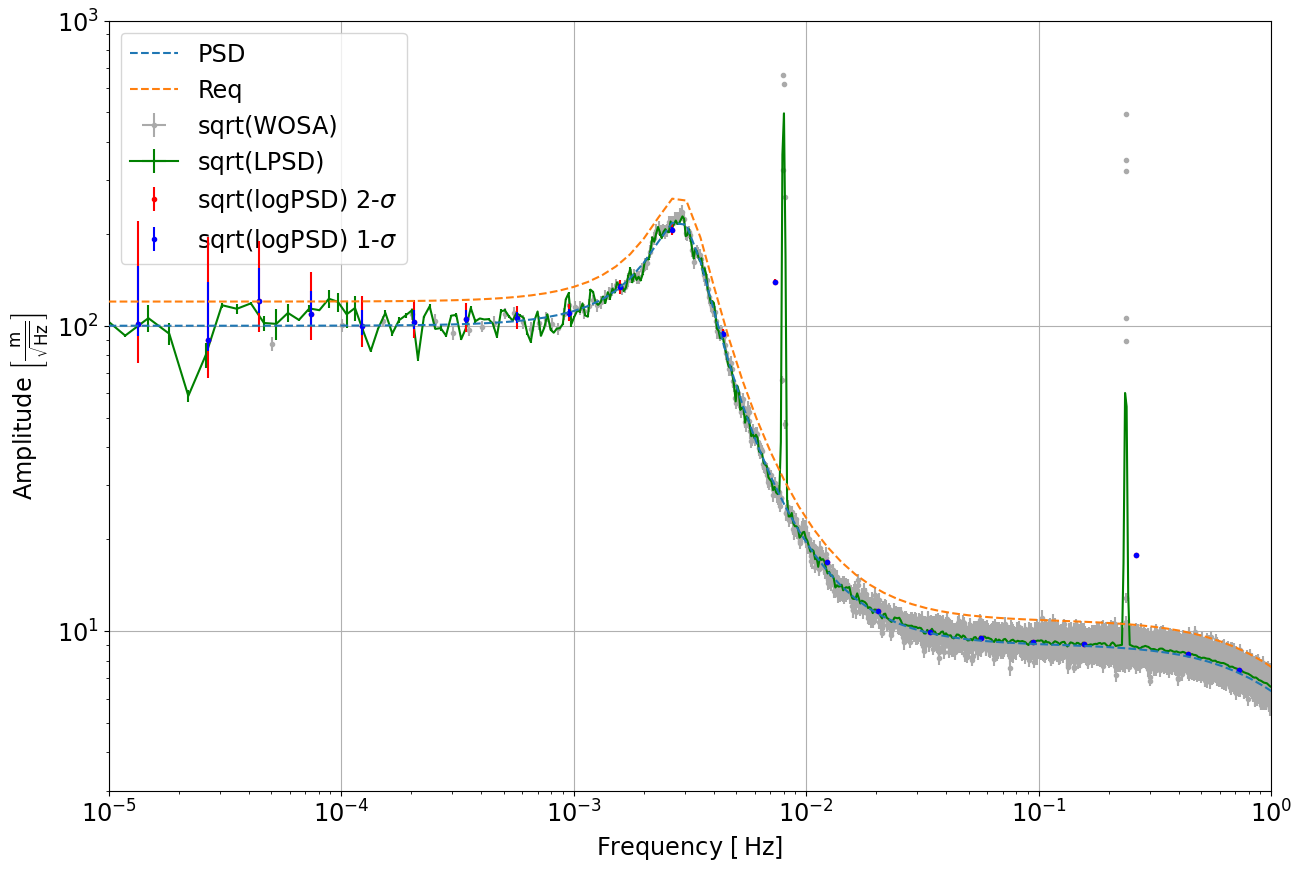

In [11]:
# Plot

from matplotlib import pyplot as plt
plt.figure()

S_ts.color = "#AAAAAA"
S_lts.color = "g"
S_ts.sqrt().loglog(S_lts.sqrt(), showerrors=True)

Se1 = [S_lts1.sqrt().ydata() - Smin1.sqrt().ydata(), Smax1.sqrt().ydata() - S_lts1.sqrt().ydata()]
Se2 = [S_lts2.sqrt().ydata() - Smin2.sqrt().ydata(), Smax2.sqrt().ydata() - S_lts2.sqrt().ydata()]

plt.errorbar(S_lts2.sqrt().xdata(), S_lts2.sqrt().ydata(),
             yerr=Se2, color="r", linestyle='none', marker='.', label="sqrt(logPSD) 2-$\sigma$", zorder=10)

plt.errorbar(S_lts1.sqrt().xdata(), S_lts1.sqrt().ydata(),
             yerr=Se1, color="b", linestyle='none', marker='.', label="sqrt(logPSD) 1-$\sigma$", zorder=20)


plt.loglog(S_r.abs().xdata(), S_r.abs().ydata(), linestyle="--", label="PSD", zorder=30)
plt.loglog(S_req.abs().xdata(), S_req.abs().ydata(), linestyle="--", label="Req", zorder=30)

# plt.gca().set_ylim(0.1, 10)
plt.legend()

plt.gca().set_xlim(1e-5, 1)
plt.gca().set_ylim(3, 1000)
plt.savefig("logpsd_test.pdf")

In [12]:

plt.savefig("logpsd_test.png")


<Figure size 1500x1000 with 0 Axes>

In [13]:
print(S_lts1.xdata()[0])

1.3333333333333333e-05
